# 1. Problem Statement and Dataset Selection

**Define problem statement and objectives**

The goal of this project is to predict and understand the factors that influence **obesity levels** in individuals.

Obesity is a complex condition affected by demographic characteristics *such as age, height, and weight and lifestyle habits such as eating frequency, vegetable consumption, water intake, physical activity, and screen time*.

The objective is to identify which features have the strongest impact. This analysis can provide insights into health-related behaviors and support preventive strategies.

**Select dataset and justify the chosen ML technique**

The selected dataset is “[Estimation of Obesity Levels Based on Eating Habits and Physical Condition](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition)” from the UCI Machine Learning Repository.

The dataset contains information about 2,111 individuals, including demographic features and lifestyle habits. The target variable is NObeyesdad, which classifies individuals into seven categories ranging from Insufficient Weight to Obesity Type III.

This dataset allows to train models to predict obesity levels based on measurable features.

In [1]:
# ================================
# Import Libraries
# ================================
# Import all commonly used libraries at the beginning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from scipy.stats import f_oneway

# Set a consistent style for plots
sns.set(style="whitegrid")

# 2. Data Preparation and Exploration
- Data Cleaning and Preprocessing
- The dataset was loaded from the UCI repository in CSV format.
- The dataset dimensions were checked (df.shape) to understand the number of rows and columns.
- Using df.info() and df.describe(), data types, non-null counts, and summary statistics (mean, standard deviation, min, max) ware reviewed.
- Missing values were checked with df.isnull().sum(). No missing data was found, so no imputation was required.
- The target variable NObeyesdad was later encoded into numeric labels using LabelEncoder to prepare it for machine learning models.
- Exploratory Data Analysis (EDA) and Visualization
- The distribution of features across obesity levels was checked. For example, a boxplot of Weight vs. Obesity Level showed clear differences in weight across categories.
- To statistically confirm these differences, ANOVA test (scipy.stats.f_oneway) was performed, which indicated that weight varies significantly between obesity levels (F-statistic very high, p-value ≈ 0.0000).
- Random Forest feature importance was used to identify which variables most strongly influence obesity classification. Weight was the most important feature, followed by height and age, while lifestyle habits (vegetable consumption, physical activity, water intake, screen time) had smaller but still relevant contributions.
- Visualizations such as bar plots and heatmaps were used to make these findings clear and interpretable.


In [2]:
# ================================
# Load Dataset
# ================================
# Load the dataset from CSV file
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# Check dataset dimensions (rows, columns)
print("Dataset shape:", df.shape)

# Display summary information: column types, non-null counts
df.info()

# Generate summary statistics for numerical columns
df.describe()

# Check for missing values in each column
missing = df.isnull().sum()
print("Missing values per column:\n", missing[missing > 0])

Dataset shape: (2111, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF     

In [3]:
# ================================
# Table overview (first 10 rows)
# ================================

df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


# [Estimation of Obesity Levels Based On Eating Habits and Physical Condition](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition)
Donated on 8/26/2019

**Dataset Information:**

- Dataset Characteristics: Multivariate
- Subject Area: Health and Medicine
- Instances: 2111
- Features: 16

**Additional Information**

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

**Variables Description:**
- **family_history_with_overweight:** Has a family member suffered or suffers from overweight?
- **FAVC:** Do you eat high caloric food frequently?
- **FCVC:** Do you usually eat vegetables in your meals?
- **NCP:** How many main meals do you have daily?
- **CAEC:** Do you eat any food between meals?
- **SMOKE:** Do you smoke?
- **CH2O:** How much water do you drink daily?
- **SCC:** Do you monitor the calories you eat daily?
- **FAF:** How often do you have physical activity?
- **TUE:** How much time do you use technological devices such as cell phone, videogames, television, computer and others?
- **CALC:** How often do you drink alcohol?
- **MTRANS:** Which transportation do you usually use?








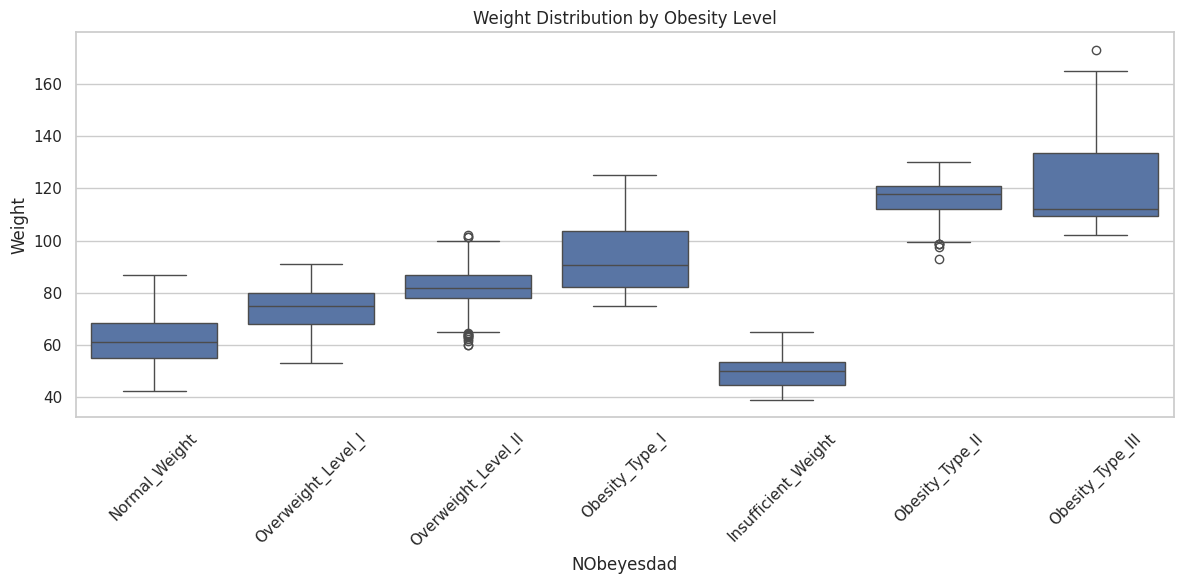

In [4]:
# ================================
# Exploratory Data Analysis (EDA)
# ================================
# Example: Boxplot of Weight distribution across obesity levels
# Set figure size (width=12, height=6)

plt.figure(figsize=(12, 6))
sns.boxplot(x='NObeyesdad', y='Weight', data=df)
plt.xticks(rotation=45)
plt.title('Weight Distribution by Obesity Level')
plt.tight_layout()
plt.show()

In [5]:
# ================================
# Statistical Test (ANOVA)
# ================================
# ANOVA checks if mean values of Weight differ significantly across obesity categories

groups = [df[df['NObeyesdad'] == label]['Weight'] for label in df['NObeyesdad'].unique()]
f_stat, p_val = f_oneway(*groups)

print(f"ANOVA for Weight across Obesity Levels: F={f_stat:.2f}, p={p_val:.4f}")

# Interpretation:
# - F-statistic: higher values indicate stronger differences between groups
# - p-value: probability that differences are random
#   If p < 0.05 → statistically significant differences

ANOVA for Weight across Obesity Levels: F=1966.52, p=0.0000


In [6]:
# ================================
# One-Hot Encoding
# ================================
# Encode all categorical features into numeric format using One-Hot Encoding.
# Drop the target column 'NObeyesdad' to keep only predictors.
# The parameter drop_first=True avoids dummy variable trap by removing one category per feature.
X = pd.get_dummies(df.drop('NObeyesdad', axis=1), drop_first=True)

In [7]:
# Display the first 10 rows of the encoded feature matrix
X.head(10)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,False,True,...,False,False,False,False,False,True,False,False,True,False
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,False,True,...,False,True,True,False,True,False,False,False,True,False
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,True,True,...,False,False,False,True,False,False,False,False,True,False
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,True,False,...,False,False,False,True,False,False,False,False,False,True
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,True,False,...,False,False,False,False,True,False,False,False,True,False
5,29.0,1.62,53.0,2.0,3.0,2.0,0.0,0.0,True,False,...,False,False,False,False,True,False,False,False,False,False
6,23.0,1.50,55.0,3.0,3.0,2.0,1.0,0.0,False,True,...,False,False,False,False,True,False,False,True,False,False
7,22.0,1.64,53.0,2.0,3.0,2.0,3.0,0.0,True,False,...,False,False,False,False,True,False,False,False,True,False
8,24.0,1.78,64.0,3.0,3.0,2.0,1.0,1.0,True,True,...,False,False,False,True,False,False,False,False,True,False
9,22.0,1.72,68.0,2.0,3.0,2.0,1.0,1.0,True,True,...,False,False,False,False,False,True,False,False,True,False


In [8]:
# Convert all boolean columns (True/False) into integers (1/0) for consistency in the feature matrix
X = X.astype(int)


In [9]:
# Display the data types of each column in X to verify that all features are numeric
X.dtypes

,0
Age,int64
Height,int64
Weight,int64
FCVC,int64
NCP,int64
CH2O,int64
FAF,int64
TUE,int64
Gender_Male,int64
family_history_with_overweight_yes,int64


In [10]:
# Count the number of males and females in the dataset
df['Gender'].value_counts()

,count
Gender,
Male,1068
Female,1043


/tmp/ipython-input-3697150716.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette='viridis')


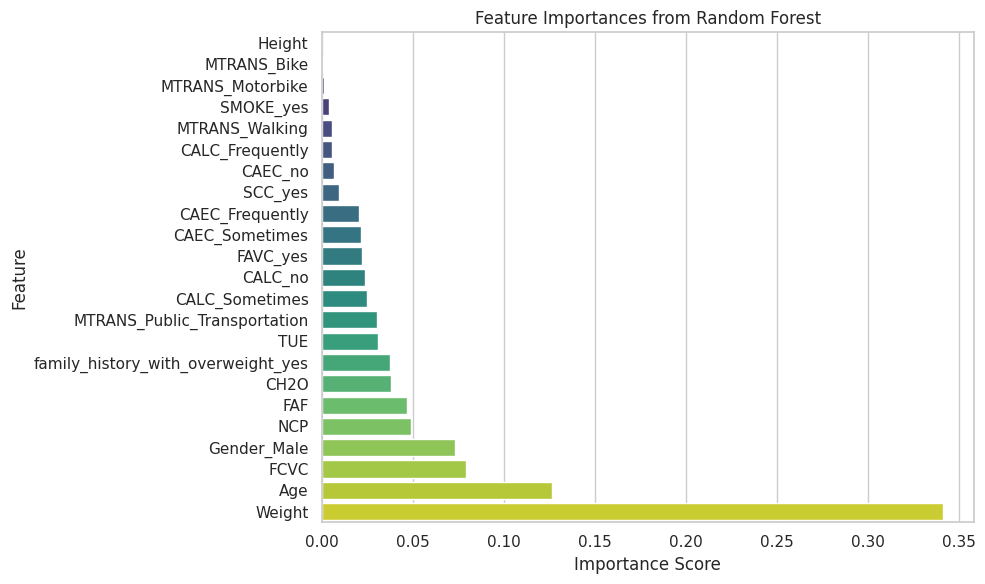

In [41]:
# ================================
# Feature Importance (Random Forest)
# ================================
# Encode target variable into numeric labels
le = LabelEncoder()
df['Obesity_Level_Num'] = le.fit_transform(df['NObeyesdad'])

# Define features (X) and target (y)
X = pd.get_dummies(df[['Gender', 'Age', 'Height', 'Weight',
                       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP',
                       'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']],
                   drop_first=True).astype(int)
y = df['Obesity_Level_Num']

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Extract feature importance scores
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values()

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index, palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
# Number of records in each obesity category
df['NObeyesdad'].value_counts()

,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


In [42]:
# ================================
# Multiclass Classification (Logistic Regression)
# ================================
# Scale features for Logistic Regression (important for optimization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [43]:
# Train Logistic Regression model (multinomial for multiple classes)
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Logistic Regression model (multinomial for multiple classes)
log_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_model.fit(X_train, y_train)

# Predict on test set
y_pred = log_model.predict(X_test)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.82      0.91      0.86        54
      Normal_Weight       0.62      0.57      0.59        58
     Obesity_Type_I       0.76      0.71      0.74        70
    Obesity_Type_II       0.87      1.00      0.93        60
   Obesity_Type_III       0.98      0.98      0.98        65
 Overweight_Level_I       0.68      0.66      0.67        58
Overweight_Level_II       0.63      0.59      0.61        58

           accuracy                           0.78       423
          macro avg       0.77      0.77      0.77       423
       weighted avg       0.77      0.78      0.77       423



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/tmp/ipython-input-3789331215.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f1_scores, y=le.classes_, palette="Blues_d")


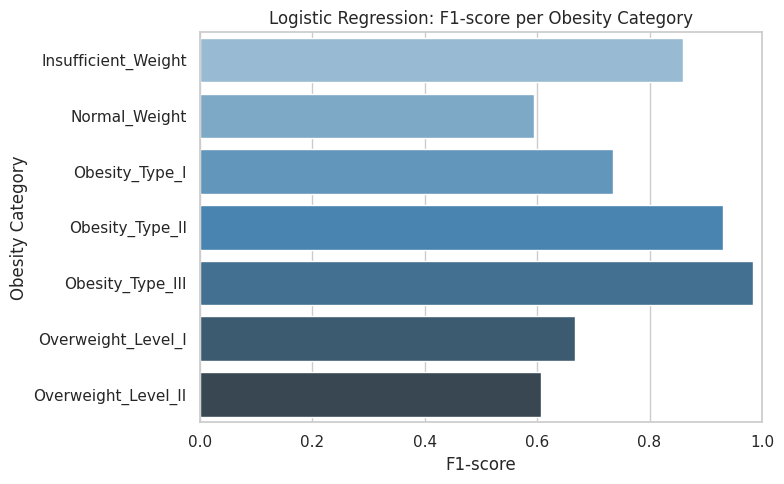

In [44]:
# Visualize F1-score for each obesity category
report_dict = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)

# Extract F1-scores for each class
f1_scores = [report_dict[label]['f1-score'] for label in le.classes_]

# Create horizontal barplot
plt.figure(figsize=(8, 5))
sns.barplot(x=f1_scores, y=le.classes_, palette="Blues_d")
plt.title("Logistic Regression: F1-score per Obesity Category")
plt.xlabel("F1-score")
plt.ylabel("Obesity Category")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

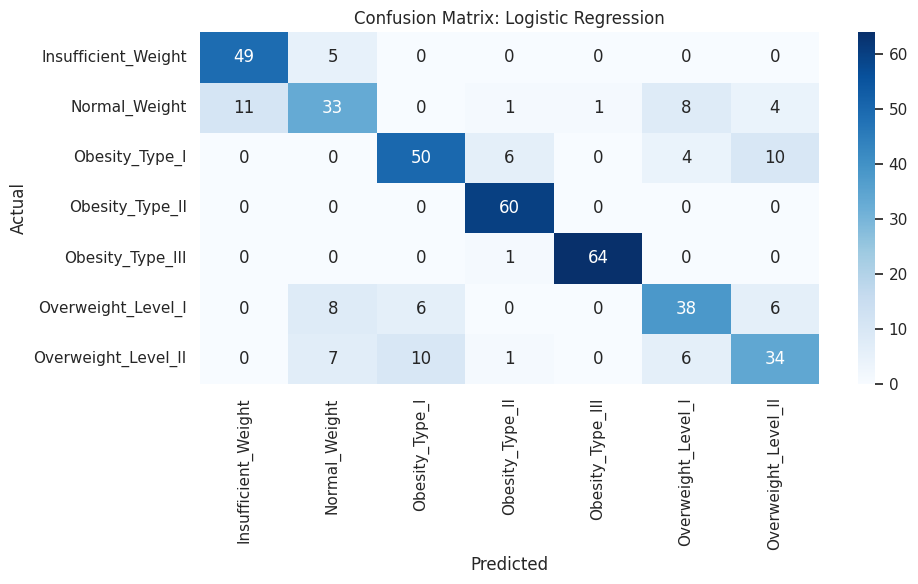

In [45]:
# Confusion matrix: visualize prediction errors
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Logistic Regression')
plt.tight_layout()
plt.show()

Weight, Height, Age, and family_history_with_overweight were removed from the impact list of obesity level prediction in order to focus on controllable, lifestyle-related factors.

/tmp/ipython-input-3283398480.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette='viridis')


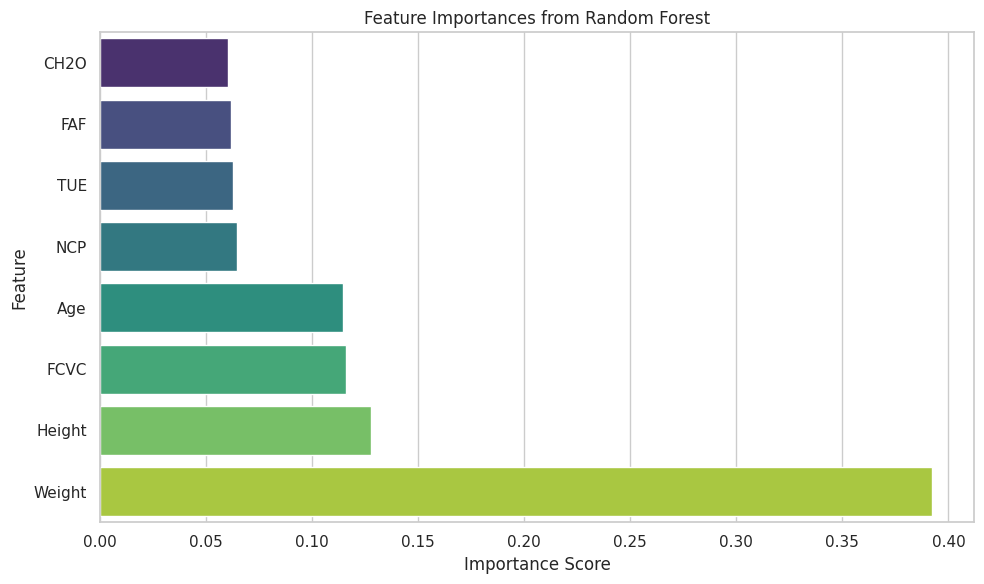

In [46]:
# ================================
# Feature Importance (Random Forest) with Weight, Height, Age, and family_history_with_overweight removed
# ================================
# Encode target variable into numeric labels
le = LabelEncoder()
df['Obesity_Level_Num'] = le.fit_transform(df['NObeyesdad'])

# Define features (X) and target (y)
X = df[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']]
y = df['Obesity_Level_Num']

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Extract feature importance scores
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values()

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index, palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [26]:
# ================================
# Feature Importance (Random Forest) by Gender
# ================================

# Encode target variable into numeric labels
le = LabelEncoder()
df['Obesity_Level_Num'] = le.fit_transform(df['NObeyesdad'])

# Split dataset by gender
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

# Define features (exclude Gender itself, since we split by it)
features = ['Age', 'Height', 'Weight', 'family_history_with_overweight',
            'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC',
            'FAF', 'TUE', 'CALC', 'MTRANS']


/tmp/ipython-input-1621315915.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_female.values, y=importances_female.index, palette='Reds')


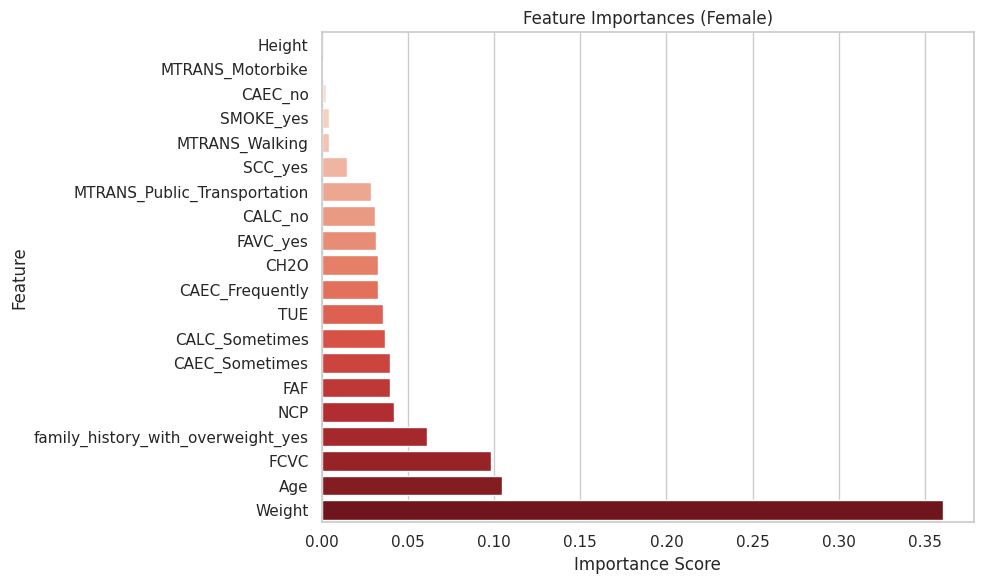

In [27]:
# --- Female model ---
X_female = pd.get_dummies(df_female[features], drop_first=True).astype(int)
y_female = df_female['Obesity_Level_Num']

rf_female = RandomForestClassifier(random_state=42)
rf_female.fit(X_female, y_female)

importances_female = pd.Series(rf_female.feature_importances_, index=X_female.columns).sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_female.values, y=importances_female.index, palette='Reds')
plt.title('Feature Importances (Female)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


/tmp/ipython-input-134625204.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_male.values, y=importances_male.index, palette='Blues')


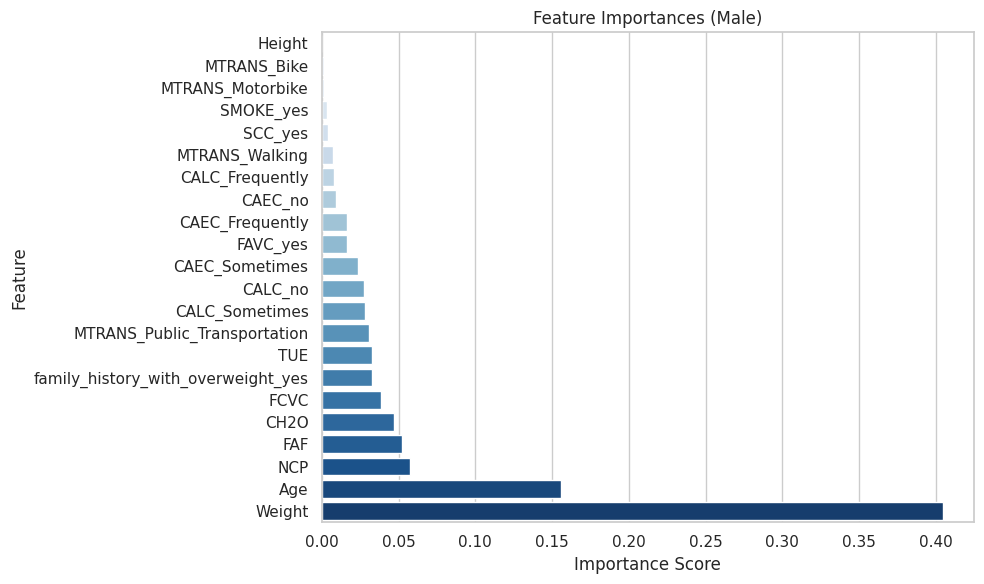

In [28]:
# --- Male model ---
X_male = pd.get_dummies(df_male[features], drop_first=True).astype(int)
y_male = df_male['Obesity_Level_Num']

rf_male = RandomForestClassifier(random_state=42)
rf_male.fit(X_male, y_male)

importances_male = pd.Series(rf_male.feature_importances_, index=X_male.columns).sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_male.values, y=importances_male.index, palette='Blues')
plt.title('Feature Importances (Male)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [29]:
# ================================
# Feature Importance (Random Forest) by Gender without Weight, Height, Age, and family_history_with_overweight
# ================================

# Encode target variable into numeric labels
le = LabelEncoder()
df['Obesity_Level_Num'] = le.fit_transform(df['NObeyesdad'])

# Split dataset by gender
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

# Define features (exclude Gender itself, since we split by it)
features = ['FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC',
            'FAF', 'TUE', 'CALC', 'MTRANS']

/tmp/ipython-input-2194393341.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_female.values, y=importances_female.index, palette='Reds')


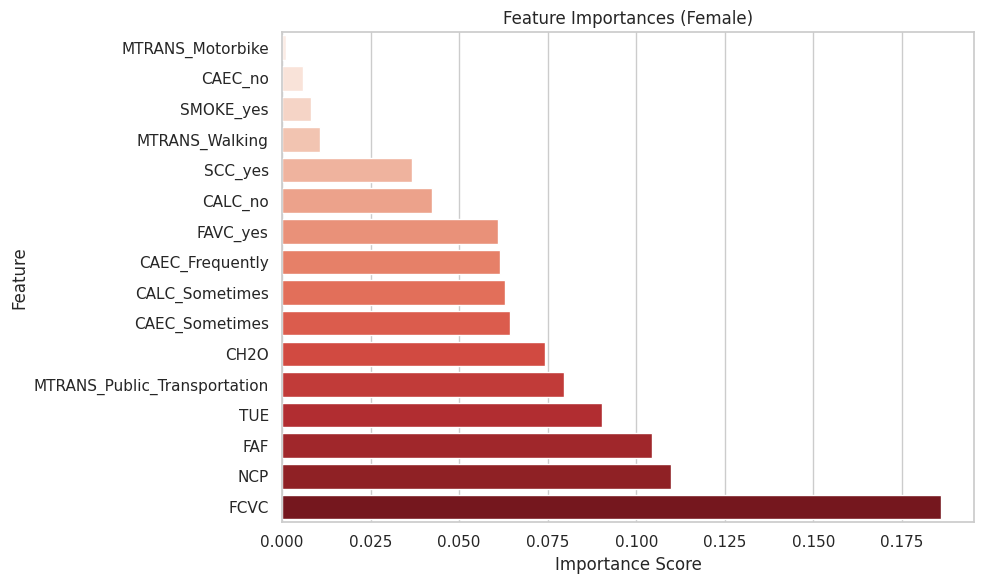

In [21]:
# --- Female model ---
X_female = pd.get_dummies(df_female[features], drop_first=True).astype(int)
y_female = df_female['Obesity_Level_Num']

rf_female = RandomForestClassifier(random_state=42)
rf_female.fit(X_female, y_female)

importances_female = pd.Series(rf_female.feature_importances_, index=X_female.columns).sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_female.values, y=importances_female.index, palette='Reds')
plt.title('Feature Importances (Female)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

/tmp/ipython-input-134625204.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_male.values, y=importances_male.index, palette='Blues')


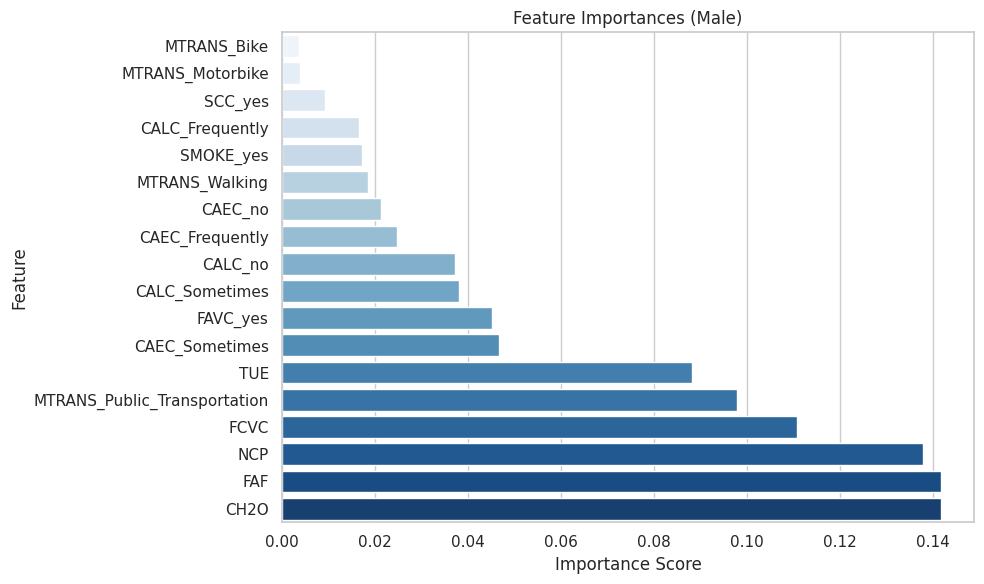

In [22]:
# --- Male model ---
X_male = pd.get_dummies(df_male[features], drop_first=True).astype(int)
y_male = df_male['Obesity_Level_Num']

rf_male = RandomForestClassifier(random_state=42)
rf_male.fit(X_male, y_male)

importances_male = pd.Series(rf_male.feature_importances_, index=X_male.columns).sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_male.values, y=importances_male.index, palette='Blues')
plt.title('Feature Importances (Male)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [30]:
# Number of records in each obesity category for females
df_female['NObeyesdad'].value_counts()


,count
NObeyesdad,
Obesity_Type_III,323
Insufficient_Weight,173
Obesity_Type_I,156
Overweight_Level_I,145
Normal_Weight,141
Overweight_Level_II,103
Obesity_Type_II,2


In [31]:
# Number of records in each obesity category for males
df_male['NObeyesdad'].value_counts()

,count
NObeyesdad,
Obesity_Type_II,295
Obesity_Type_I,195
Overweight_Level_II,187
Normal_Weight,146
Overweight_Level_I,145
Insufficient_Weight,99
Obesity_Type_III,1


In [32]:
#================================
# Grouped obesity categories for females
#================================
df_female['Obesity_Grouped'] = df_female['NObeyesdad'].replace({
    'Obesity_Type_I': 'Obesity',
    'Obesity_Type_II': 'Obesity',
    'Obesity_Type_III': 'Obesity',
    'Overweight_Level_I': 'Overweight',
    'Overweight_Level_II': 'Overweight',
    'Normal_Weight': 'Normal_Weight',
    'Insufficient_Weight': 'Insufficient_Weight'
})

# Grouped obesity categories for males
df_male['Obesity_Grouped'] = df_male['NObeyesdad'].replace({
    'Obesity_Type_I': 'Obesity',
    'Obesity_Type_II': 'Obesity',
    'Obesity_Type_III': 'Obesity',
    'Overweight_Level_I': 'Overweight',
    'Overweight_Level_II': 'Overweight',
    'Normal_Weight': 'Normal_Weight',
    'Insufficient_Weight': 'Insufficient_Weight'
})

# Check new distribution
print("Female distribution:")
print(df_female['Obesity_Grouped'].value_counts())

print("\nMale distribution:")
print(df_male['Obesity_Grouped'].value_counts())

Female distribution:
Obesity_Grouped
Obesity                481
Overweight             248
Insufficient_Weight    173
Normal_Weight          141
Name: count, dtype: int64

Male distribution:
Obesity_Grouped
Obesity                491
Overweight             332
Normal_Weight          146
Insufficient_Weight     99
Name: count, dtype: int64


/tmp/ipython-input-4001400512.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female['Obesity_Grouped'] = df_female['NObeyesdad'].replace({
/tmp/ipython-input-4001400512.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_male['Obesity_Grouped'] = df_male['NObeyesdad'].replace({


/tmp/ipython-input-1452595483.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_female.values, y=importances_female.index, palette='Reds')


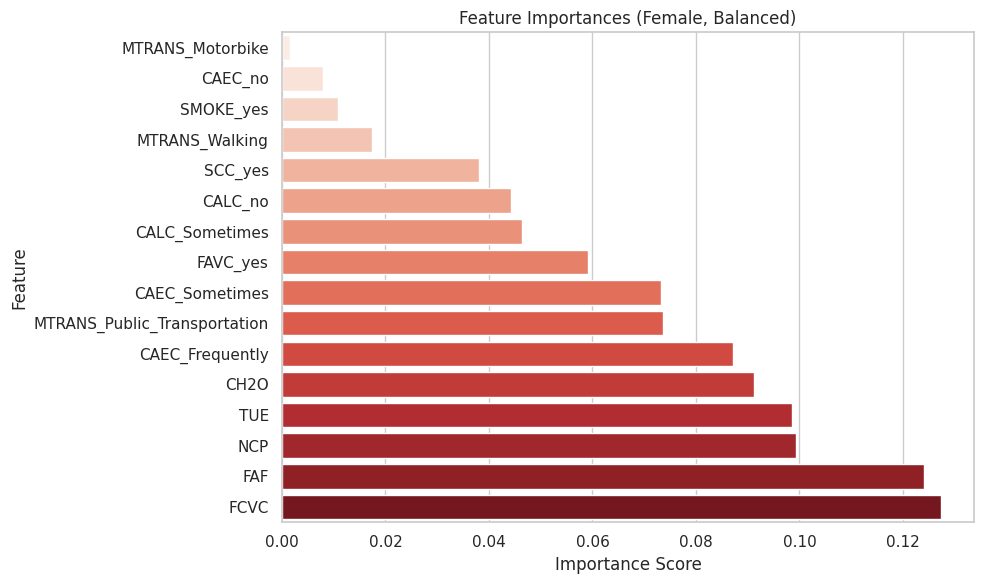

In [33]:
# ================================
# Random Forest with class balancing (Female)
# ================================
X_female = pd.get_dummies(df_female[features], drop_first=True).astype(int)
y_female = df_female['Obesity_Grouped']

rf_female = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_female.fit(X_female, y_female)

importances_female = pd.Series(rf_female.feature_importances_, index=X_female.columns).sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_female.values, y=importances_female.index, palette='Reds')
plt.title('Feature Importances (Female, Balanced)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


/tmp/ipython-input-3664758523.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_male.values, y=importances_male.index, palette='Blues')


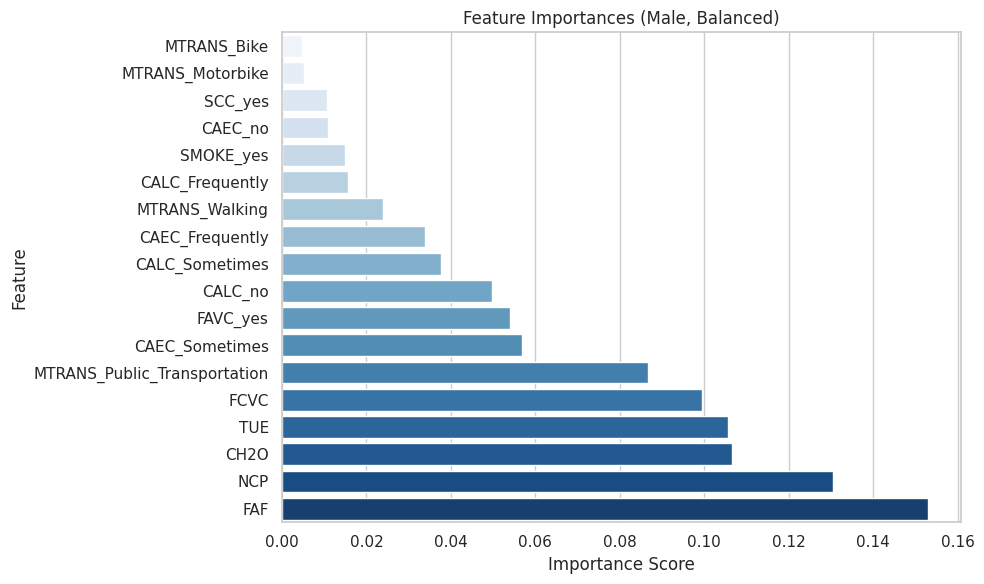

In [34]:
# ================================
# Random Forest with class balancing (Male)
# ================================
X_male = pd.get_dummies(df_male[features], drop_first=True).astype(int)
y_male = df_male['Obesity_Grouped']

rf_male = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_male.fit(X_male, y_male)

importances_male = pd.Series(rf_male.feature_importances_, index=X_male.columns).sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_male.values, y=importances_male.index, palette='Blues')
plt.title('Feature Importances (Male, Balanced)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [35]:
# ================================
# Multiclass Logistic Regression (Female)
# ================================
X_female = pd.get_dummies(df_female[features], drop_first=True).astype(int)
y_female = df_female['Obesity_Grouped']

log_female = LogisticRegression(random_state=42, class_weight='balanced',
                                multi_class='multinomial', max_iter=1000)
log_female.fit(X_female, y_female)

y_pred_female = log_female.predict(X_female)

print("Classification Report (Female):")
print(classification_report(y_female, y_pred_female))


Classification Report (Female):
                     precision    recall  f1-score   support

Insufficient_Weight       0.76      0.69      0.73       173
      Normal_Weight       0.48      0.49      0.48       141
            Obesity       0.85      0.77      0.81       481
         Overweight       0.55      0.69      0.61       248

           accuracy                           0.70      1043
          macro avg       0.66      0.66      0.66      1043
       weighted avg       0.72      0.70      0.70      1043



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


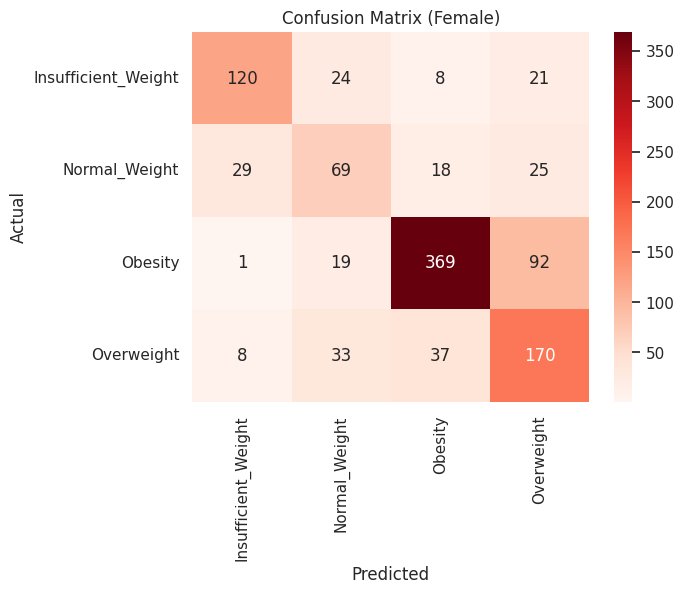

In [36]:
# Confusion matrix (Female)
cm_female = confusion_matrix(y_female, y_pred_female, labels=log_female.classes_)
sns.heatmap(cm_female, annot=True, fmt='d', cmap='Reds',
            xticklabels=log_female.classes_, yticklabels=log_female.classes_)
plt.title("Confusion Matrix (Female)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/tmp/ipython-input-2579961467.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_female_scores.index[:-3],  # exclude avg rows


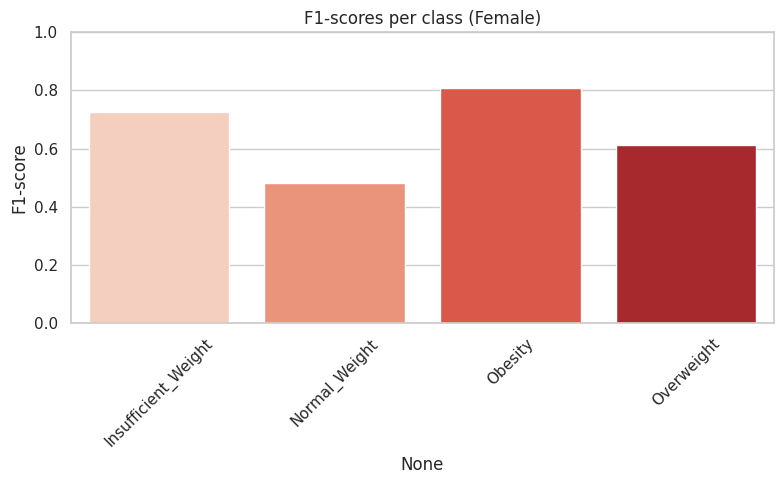

In [37]:
# F1-score visualization for Female dataset
report_female = classification_report(y_female, y_pred_female, output_dict=True)
df_female_scores = pd.DataFrame(report_female).transpose()

plt.figure(figsize=(8,5))
sns.barplot(x=df_female_scores.index[:-3],  # exclude avg rows
            y=df_female_scores['f1-score'][:-3],
            palette='Reds')
plt.title("F1-scores per class (Female)")
plt.ylabel("F1-score")
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.tight_layout()
plt.show()

In [38]:
# ================================
# Multiclass Logistic Regression (Male)
# ================================
X_male = pd.get_dummies(df_male[features], drop_first=True).astype(int)
y_male = df_male['Obesity_Grouped']

log_male = LogisticRegression(random_state=42, class_weight='balanced',
                              multi_class='multinomial', max_iter=1000)
log_male.fit(X_male, y_male)

y_pred_male = log_male.predict(X_male)

print("Classification Report (Male):")
print(classification_report(y_male, y_pred_male))


Classification Report (Male):
                     precision    recall  f1-score   support

Insufficient_Weight       0.32      0.65      0.43        99
      Normal_Weight       0.58      0.63      0.60       146
            Obesity       0.65      0.61      0.63       491
         Overweight       0.54      0.40      0.46       332

           accuracy                           0.55      1068
          macro avg       0.52      0.57      0.53      1068
       weighted avg       0.57      0.55      0.55      1068



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


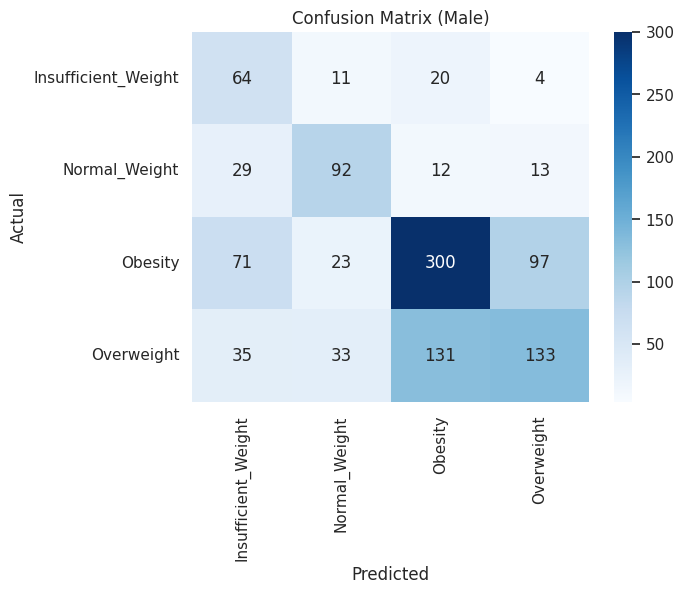

In [39]:
# Confusion matrix (Male)
cm_male = confusion_matrix(y_male, y_pred_male, labels=log_male.classes_)
sns.heatmap(cm_male, annot=True, fmt='d', cmap='Blues',
            xticklabels=log_male.classes_, yticklabels=log_male.classes_)
plt.title("Confusion Matrix (Male)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/tmp/ipython-input-1066826791.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_male_scores.index[:-3],


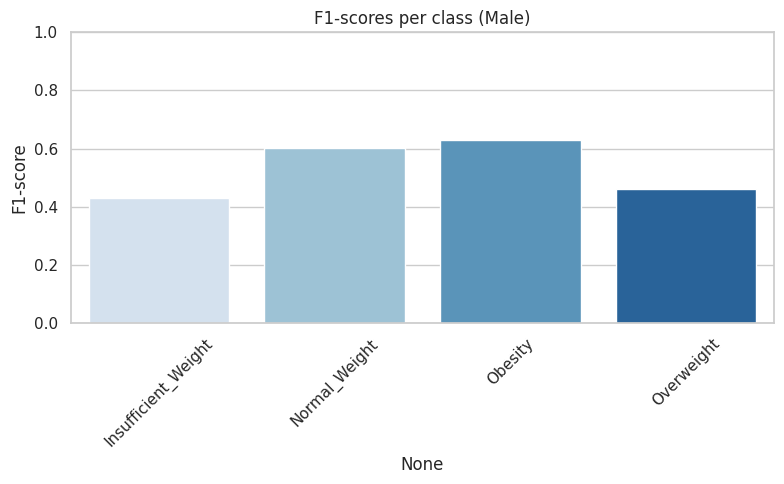

In [40]:
# F1-score visualization for Male dataset
report_male = classification_report(y_male, y_pred_male, output_dict=True)
df_male_scores = pd.DataFrame(report_male).transpose()

plt.figure(figsize=(8,5))
sns.barplot(x=df_male_scores.index[:-3],
            y=df_male_scores['f1-score'][:-3],
            palette='Blues')
plt.title("F1-scores per class (Male)")
plt.ylabel("F1-score")
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.tight_layout()
plt.show()